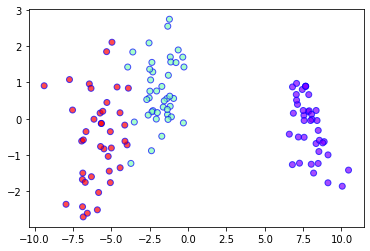

In [1]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
#StandardScaler removes the mean and scales each feature/variable to unit variance.
sc = StandardScaler()
#The fit_transform () method will determine the parameters and transform the dataset.
X = sc.fit_transform(X)
#Encode target labels with value between 0 and n_classes-1
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
	X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)




In [2]:
print(X)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [3]:
print(X_train)

[[-3.88893473  0.84264046]
 [-2.53133483  0.57327285]
 [-2.4854948   0.76071222]
 [ 7.8684093   0.66430764]
 [-2.68930357  0.52807699]
 [-5.28792479  0.44708762]
 [-6.83104234 -2.7204115 ]
 [-4.42395573 -1.35968427]
 [-6.43237282  0.96126974]
 [-3.96934081 -0.72612565]
 [-4.95702573  2.11385217]
 [-2.28507395  0.22082628]
 [-1.16236556  0.3408689 ]
 [-1.37880995  0.55438426]
 [10.46078566 -1.42474646]
 [-0.6393403   1.90038005]
 [-2.38245663 -0.88827121]
 [-3.93138684  1.42772226]
 [-1.61317048  0.31879337]
 [-5.65001547 -0.13366841]
 [ 6.80174171 -1.27300658]
 [ 8.34987488  0.22537579]
 [-2.35353256  1.55632238]
 [-4.1223422  -0.17898963]
 [-5.73085714  0.15341763]
 [ 7.83478281  0.19175576]
 [ 6.60163404 -0.43019568]
 [-3.59942584  1.84448455]
 [ 8.8733705  -0.63759978]
 [-6.92984843 -0.62098307]
 [ 9.12058444 -1.77608555]
 [-5.82759995 -2.04464402]
 [-1.5493054   0.49137595]
 [-1.33562257  0.11118933]
 [ 7.44773407  0.80622585]
 [-2.43776215  1.07088725]
 [-6.82248279 -0.58867047]
 

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[14  0  0]
 [ 0  9  1]
 [ 0  0  6]]
Accuracy0.9666666666666667
